# Notation
- $s_t$ - state
- $o_t$ - observation
- $a_t$ - action
- $\pi_\theta(a_t|o_t)$ - policy
- $\pi_\theta(a_t|s_t)$ - policy (fully observed)
- $p(s_{t+1}|s_t,a_t)$ is independant of $s_{t-1}$
- $r(s, a)$ - reward function

# Markov Chain
$\mathcal M = \{\mathcal S, \mathcal T\}$
- $\mathcal S$ - state space
- $\mathcal T$ - transition operator
- $\mathcal T_{i, j} = p(s_{t+1}= i | s_t = j)$
- $\mu_{t, i} = p(s_t = i)$
- $\mu_t$ is a vector of state probabilities
- $\mu_{t+1} = \mathcal T \mu_t$

# Markov Decision Process
$\mathcal M = \{\mathcal S, \mathcal A, \mathcal T, r\}$
- $\mathcal S$ - state space
- $\mathcal A$ - action space
- $\mathcal T$ - transition operator
- $\mathcal T_{i, j, k} = p(s_{t+1}= i | s_t = j, a_t = k)$
- $r$ - reward function


# Objective
$$p(s_1, a_1, ..., s_T, a_T) = p(s_1)\prod_{t=1}^T \pi_\theta(a_t|s_t)p(s_{t+1}|s_t, a_t) = p(\tau)$$

- $\theta^* = \argmax_\theta E_{p_\theta(\tau)}\left[\sum_t r(s_t, a_t)\right]$

- $p(s_{t+1}, a_{t+1}|s_t, a_t) = p(s_{t+1}|s_t, a_t)\pi_\theta(a_{t+1}|s_{t+1})$

- $\theta^* 
    = \argmax_\theta E_{p_\theta(\tau)}\left[\sum_t r(s_t, a_t)\right]
    = \argmax_\theta \sum_t E_{p_\theta(s_t, a_t)}[r(s_t, a_t)]$

- If $T$ is unbounded and stationary distribution $p_\theta(s, a)$ exists, 
    then $\theta^* =  \argmax_\theta E_{p_\theta(s, a)}[r(s, a)]$

- Even if $r(x)$ is not smooth, we can optimize $E_{\pi_\theta}[r(x)]$,
    because $E_{\pi_\theta}[r(x)]$ is smooth in $\theta$

<br>

- $E_{p_\theta(\tau)}\left[\sum_t r(s_t, a_t)\right]
    = E_{p(s_1)}[
        E_{\pi_\theta(a_1|s_1)}[r(s_1, a_1) +
            E_{p(s_2|s_1, a_1)}[
                E_{\pi_\theta(a_2|s_2)}[r(s_2, a_2) +
                    ... | s_2
                ]
            ] \ | s_1
        ]]$
    
- $Q(s_1, a_1) = r(s_1, a_1) + E_{p(s_2|s_1, a_1)}[
        E_{\pi_\theta(a_2|s_2)}[r(s_2, a_2) +
            ... | s_2
        ] \ | s_1, a_1
    ]$

- $E_{p_\theta(\tau)}\left[\sum_t r(s_t, a_t)\right] 
    = E_{p(s_1)}[E_{\pi_\theta(a_1|s_1)}[Q(s_1, a_1)|s_1]]$ is easy to optimize over $a_1$ if $Q(s_1, a_1)$ is known

<br>

- $Q^{\pi_\theta}(s_t, a_t) = \sum_{t' = t}^T E_{\pi_\theta}[r(s_{t'}, a_{t'})|s_t, a_t]$

- $V^{\pi_\theta}(s_t) = \sum_{t' = t}^T E_{\pi_\theta}[r(s_{t'}, a_{t'})|s_t] 
    = E_{\pi_\theta(a_t|s_t)}[Q^{\pi_\theta}(s_t, a_t)]$

- $E_{p_\theta(\tau)}\left[\sum_t r(s_t, a_t)\right] = E_{p(s_1)}[V^{\pi_\theta}(s_1)]$

# Policy Gradient
- $r(\tau) = \sum_t r(s_t, a_t)$

- $J(\theta) = E_{p_\theta(\tau)}[r(\tau)] = \int p_{\theta}(\tau)r(\tau)d\tau$

- $\nabla_\theta J(\theta) = \int \nabla_\theta p_{\theta}(\tau)r(\tau)d\tau$

- $p_\theta(\tau)\nabla_\theta \log p_\theta(\tau) = p_\theta(\tau) 
    \frac{\nabla_\theta p_\theta(\tau)}{p_\theta(\tau)} = \nabla_\theta p_\theta(\tau)$

- $\nabla_\theta J(\theta) 
    = \int p_\theta(\tau)\nabla_\theta \log p_\theta(\tau)r(\tau)d\tau
    = E_{p_\theta(\tau)}[\nabla_\theta \log p_\theta(\tau)r(\tau)]$

- $\log p_\theta(\tau) = \log \left(p(s_1)\prod_{t=1}^T \pi_\theta(a_t|s_t)p(s_{t+1}|s_t, a_t)\right) = \log p(s_1) + \sum_{t=1}^T \log \pi_\theta(a_t|s_t) + \log p(s_{t+1}|s_t, a_t)$

- $\nabla_\theta \log p_\theta(\tau) = \sum_{t=1}^T \nabla_\theta \log \pi_\theta(a_t|s_t)$

- $\nabla_\theta J(\theta) = E_{p_\theta(\tau)}[r(\tau)\sum_{t=1}^T \nabla_\theta \log \pi_\theta(a_t|s_t)]$

- $\nabla_\theta J(\theta) \approx \frac{1}{N}\sum_{i=1}^N \nabla_\theta \log \pi_\theta(\tau_i)r(\tau_i)$

# Reducing Varience in Policy Gradient

- $\nabla_\theta J(\theta) \approx \frac{1}{N}\sum_{i=1}^N \sum_{t=1}^T 
    \nabla_\theta \log \pi_\theta(a_{i, t}|s_{i, t})\sum_{t'=1}^T r(s_{i, t'}, a_{i, t'})$

- $\nabla_\theta J(\theta) \approx \frac{1}{N}\sum_{i=1}^N \sum_{t=1}^T 
    \nabla_\theta \log \pi_\theta(a_{i, t}|s_{i, t})\sum_{t'=t}^T r(s_{i, t'}, a_{i, t'})$ from causality

- $\nabla_\theta J(\theta) \approx \frac{1}{N}\sum_{i=1}^N \sum_{t=1}^T 
    \nabla_\theta \log \pi_\theta(a_{i, t}|s_{i, t})\hat Q_{i, t}$

- $b = \frac{1}{N}\sum_{i=1}^N\pi_\theta(\tau_i)r(\tau_i)$

- $\nabla_\theta J(\theta) \approx \frac{1}{N}\sum_{i=1}^N \sum_{t=1}^T 
    \nabla_\theta \log \pi_\theta(a_{i, t}|s_{i, t})(\hat Q_{i, t} - b)$

# Policy Gradient Example

Optimizing Policy:   0%|          | 0/400 [00:00<?, ?it/s]

Optimizing Policy:   0%|          | 0/400 [00:00<?, ?it/s]

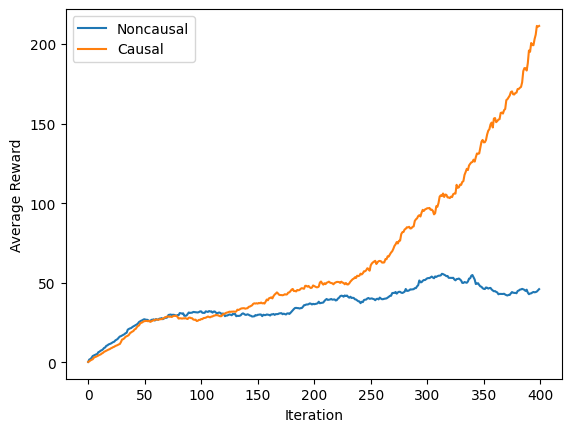

In [1]:
import torch
from torch import Tensor
from torch.nn import functional as F
from policy_grad import optimize_model, plot_rewards

device = torch.device("mps")


def noncausal_loss(logits: Tensor, a: Tensor, r: Tensor):
    return F.cross_entropy(logits, a, reduction="sum") * r.sum()


def causal_loss(logits: Tensor, a: Tensor, r: Tensor):
    q = torch.cumsum(r.flip(0), dim=0).flip(0)
    return torch.sum(F.cross_entropy(logits, a, reduction="none") * q)


noncausal_rewards = optimize_model(noncausal_loss, device, n_iters=400)
causal_rewards = optimize_model(causal_loss, device, n_iters=400)

plot_rewards({"Noncausal": noncausal_rewards, "Causal": causal_rewards})